In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df_5e6 = pd.read_csv('weak_fft_10984742.csv')
df_1e6 = pd.read_csv('weak_fft_10984754.csv')
df_250k = pd.read_csv('weak_fft_10984759.csv')

In [21]:
df_250k.head()

,experiment_id,rank,runtime,p2m,m2m,l2l,m2l,p2p,source_tree,target_tree,...,ghost_fmm_u,displacement_map,metadata_creation,expansion_order,n_points,local_depth,global_depth,block_size,n_threads,n_samples
0,0,0,121,0,0,0,0,0,2970,2935,...,0,0,40,3,250000,4,1,128,4,500
1,0,5,241,0,0,0,84,141,2970,2935,...,0,0,151,3,250000,4,1,128,4,500
2,0,1,325,8,0,0,161,143,2970,2934,...,0,1,147,3,250000,4,1,128,4,500
3,0,2,322,4,0,0,162,144,2970,2934,...,0,1,151,3,250000,4,1,128,4,500
4,0,4,322,4,0,0,164,143,2970,2934,...,0,1,151,3,250000,4,1,128,4,500


In [25]:
df_1e6.shape

(1016, 33)

In [57]:
def runtime_vs_npoints(df):
    npoints = []
    runtime = []
    for (id, experiment) in df.groupby('experiment_id'):
        n = experiment['n_points'].max()*experiment.shape[0]
        npoints.append(n)
        r = experiment['runtime'].max()
        runtime.append(r)
    
    npoints = np.array(npoints)
    runtime = np.array(runtime)
    
    fig, ax = plt.subplots()
    ax.plot(npoints, runtime, marker="o")
    ax.set_xscale('log')
    
    return (fig, ax, npoints, runtime)


def runtime_vs_nprocesses(df):
    nprocs = []
    runtime = []
    for (id, experiment) in df.groupby('experiment_id'):
        n = experiment.shape[0]
        nprocs.append(n)
        r = experiment['runtime'].max()
        runtime.append(r)
    
    nprocs = np.array(nprocs)
    runtime = np.array(runtime)
    
    fig, ax = plt.subplots()
    ax.plot(nprocs, runtime, marker="o")
    # ax.set_xscale('log')
    
    return (fig, ax, nprocs, runtime)

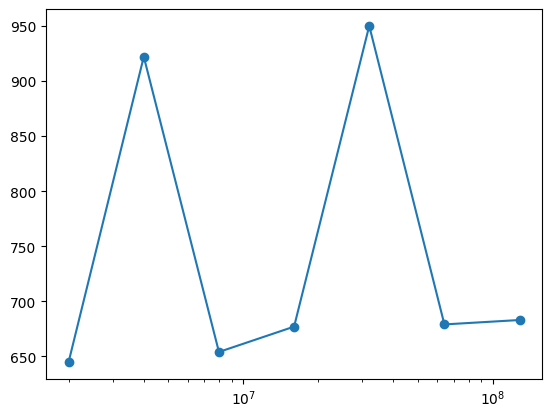

In [58]:
(fig, ax, npoints_250k, runtime_250k) = runtime_vs_npoints(df_250k)

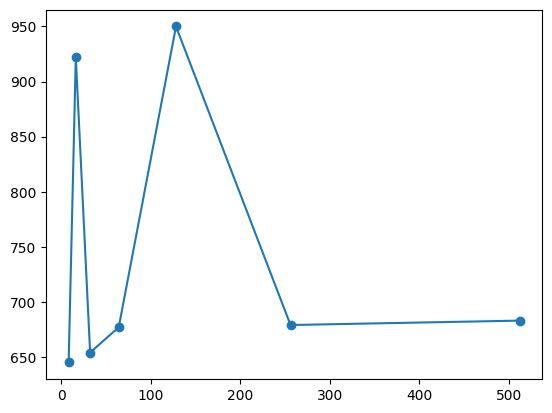

In [59]:
(fig, ax, nprocs_250k, runtime_250k) = runtime_vs_nprocesses(df_250k)

In [60]:
nprocs_250k

array([  8,  16,  32,  64, 128, 256, 512])

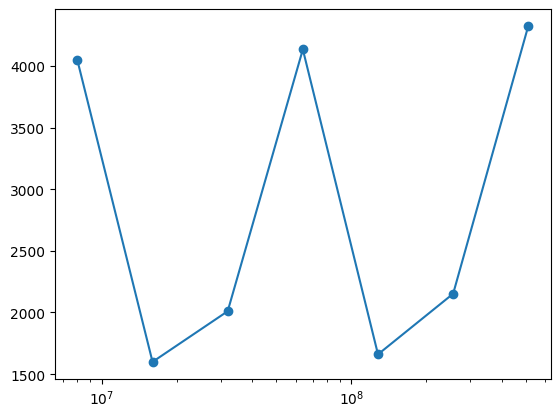

In [52]:
(fig, ax, npoints_1e6, runtime_1e6) = runtime(df_1e6)

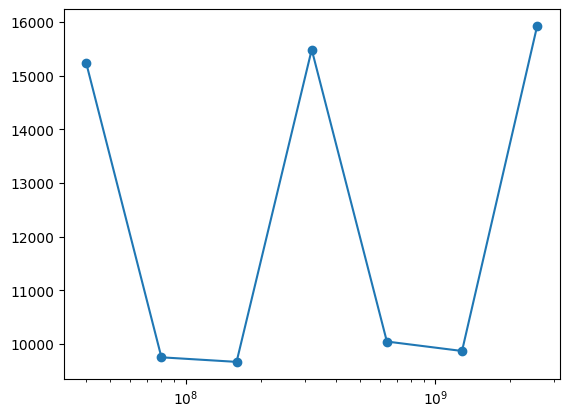

In [53]:
(fig, ax, npoints_5e6, runtime_5e6) = runtime(df_5e6)

In [6]:
df_1e6.head()

,experiment_id,rank,runtime,p2m,m2m,l2l,m2l,p2p,source_tree,target_tree,...,ghost_fmm_u,displacement_map,metadata_creation,expansion_order,n_points,local_depth,global_depth,block_size,n_threads,n_samples
0,0,2,21,9,0,0,0,0,6299,11839,...,0,0,534,3,1000000,4,1,128,4,500
1,0,1,1977,9,0,0,160,1784,6299,11839,...,0,1,541,3,1000000,4,1,128,4,500
2,0,3,1976,9,0,0,161,1784,6299,11839,...,0,1,543,3,1000000,4,1,128,4,500
3,0,6,1975,9,0,0,163,1783,6299,11839,...,0,1,544,3,1000000,4,1,128,4,500
4,0,4,1978,9,0,0,160,1788,6299,11839,...,0,1,544,3,1000000,4,1,128,4,500
